In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [77]:
df_content = pd.read_csv('../data/feature/sentiws_content.csv')
df_comment = pd.read_csv('../data/feature/sentiws_comment.csv')
df_content_knn = pd.read_csv('../data/feature/knn_clustering.csv')

C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\3826191617.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_comment1 = df_comment1.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()


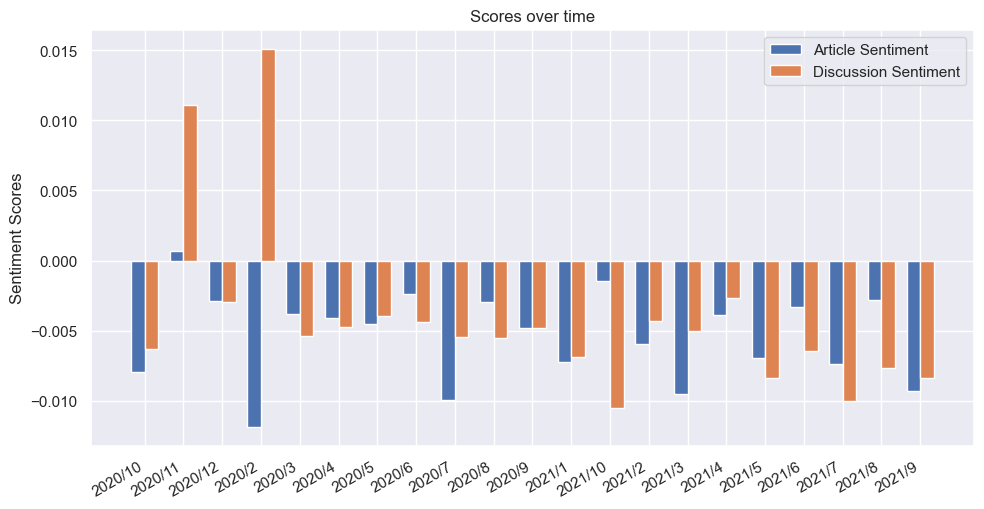

In [78]:
df_content['publishingDate'] = pd.to_datetime(df_content['publishingDate'])
df_comment1 = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], on="ID_GodotObject")
# average comment sentiment in an article discussion
#df_comment1 = df_comment1.groupby(['ID_GodotObject', 'publishingDate'])['overal_sentiment'].mean().reset_index()


df_comment1['year'] = df_comment1['publishingDate'].dt.year
df_comment1['month'] = df_comment1['publishingDate'].dt.month
df_comment1['year/month'] = df_comment1['year'].astype(str) + '/' + df_comment1['month'].astype(str)

df_comment1 = df_comment1.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()

x = np.arange(len(df_comment1['year/month']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, df_comment1['sentiment_score'], width, label='Article Sentiment')
rects2 = ax.bar(x + width/2, df_comment1['overal_sentiment'], width, label='Discussion Sentiment')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment Scores')
ax.set_title('Scores over time')
ax.set_xticks(x, df_comment1['year/month'])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.xticks(rotation=30, ha='right')
plt.savefig("sentiws_time.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()


[0, 1, 2, 3]


C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\1277736988.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\1277736988.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\1277736988.py:21: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\1277736988.py:21: FutureWarning: Indexing with multiple 

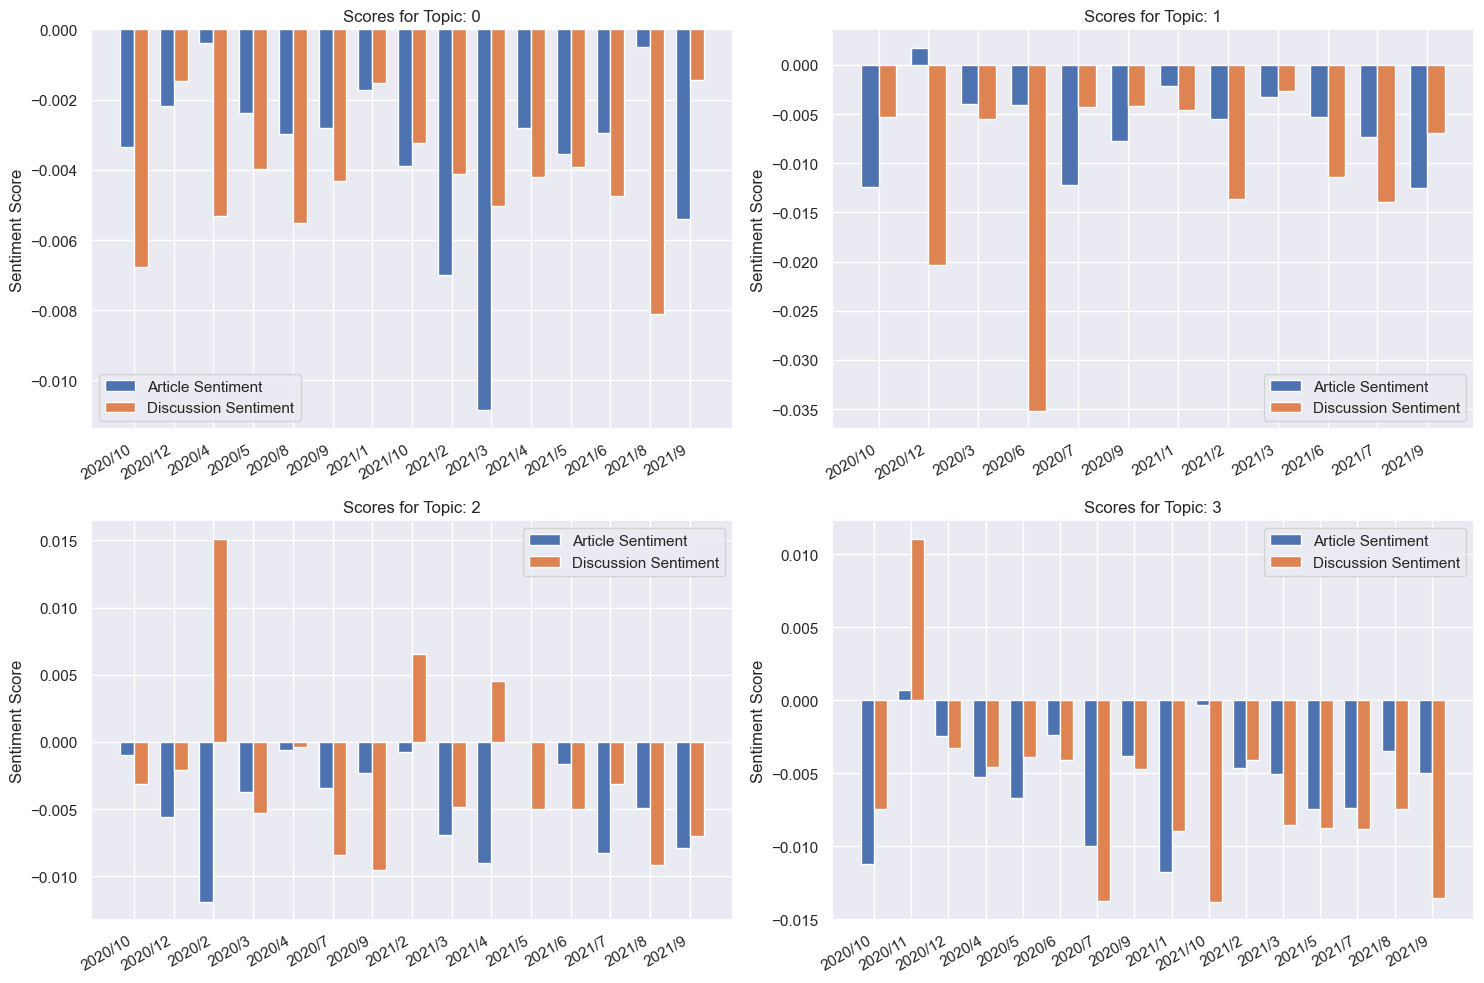

In [79]:
#Build sentiment plot for each cluster
clusters = [i for i in range(0,max(df_content_knn.cluster_value.values) + 1)]
print(clusters)

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axs = axs.flatten()

for i, ax in enumerate(axs):
    #check if ax index is cluster index
    if i not in clusters:
        continue;
    
    df_c = df_content_knn[df_content_knn['cluster_value'] == i]
    df_c = pd.merge(df_c, df_content[['publishingDate','ID_GodotObject','sentiment_score']],on="ID_GodotObject")
    df_c = pd.merge(df_c,df_comment ,on="ID_GodotObject")
    
    df_c['year'] = df_c['publishingDate'].dt.year
    df_c['month'] = df_c['publishingDate'].dt.month
    df_c['year/month'] = df_c['year'].astype(str) + '/' + df_c['month'].astype(str)
    #calculate mean for each period
    df_c = df_c.groupby(['year/month'])['sentiment_score','overal_sentiment'].mean().reset_index()
    x = np.arange(len(df_c['year/month']))  # the label locations
    width = 0.35  # the width of the bars
    
    rects1 = ax.bar(x - width/2, df_c['sentiment_score'], width, label='Article Sentiment')
    rects2 = ax.bar(x + width/2, df_c['overal_sentiment'], width, label='Discussion Sentiment')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Sentiment Score')
    #axs[0].set_ylabel("avg. Sentiment Scores")  # set y-axis label for all subplots
    ax.set_title('Scores for Topic: ' + str(i))
    ax.set_xticks(x, df_c['year/month'], rotation=30, ha='right')
    ax.legend(loc='best')

    #ax.bar_label(rects1, padding=3)
    #ax.bar_label(rects2, padding=3)
    #plt.xticks(rotation=30, ha='right')
    
fig.tight_layout()
plt.savefig("sentiws_topic_time.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()

    



C:\Users\e11925939\AppData\Local\Temp\8\ipykernel_64896\852354369.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_overall = df_overall.groupby(['cluster_value'])['sentiment_score','overal_sentiment'].mean().reset_index()


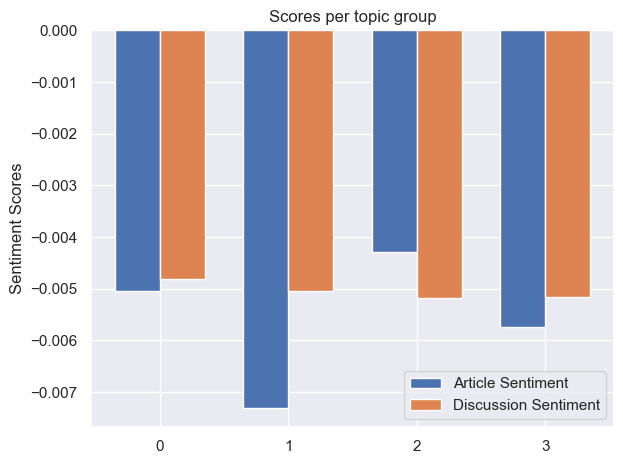

In [80]:
#see overall differences between article and comment sentiment
df_overall = pd.merge(df_comment, df_content[['publishingDate','ID_GodotObject','sentiment_score']], 
                      on="ID_GodotObject")
df_overall = pd.merge(df_overall, df_content_knn, on="ID_GodotObject")
df_overall = df_overall.groupby(['cluster_value'])['sentiment_score','overal_sentiment'].mean().reset_index()

x = np.arange(len(df_overall['cluster_value']))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_overall['sentiment_score'], width, label='Article Sentiment')
rects2 = ax.bar(x + width/2, df_overall['overal_sentiment'], width, label='Discussion Sentiment')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Sentiment Scores')
ax.set_title('Scores per topic group')
ax.set_xticks(x, df_overall['cluster_value'])
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()
#plt.xticks(rotation=30, ha='right')
plt.savefig("sentiws_topic.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()


0 scores:  88010
not 0 scores:  39602


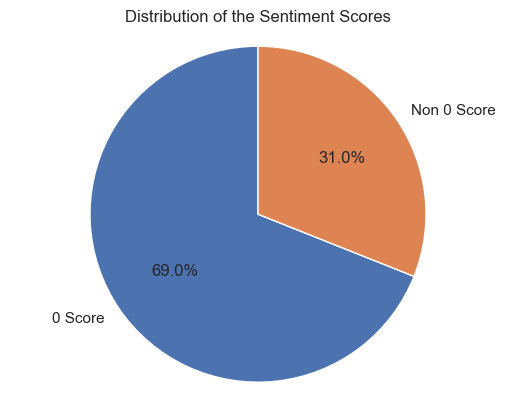

In [92]:
x = df_comment[df_comment['overal_sentiment'] == 0]
x1 = df_comment[df_comment['overal_sentiment'] != 0]
xl = len(x) / (len(x) + len(x1))
x1l = len(x1) / (len(x) + len(x1))
print('0 scores: ', len(x))
print('not 0 scores: ', len(x1))
labels = '0 Score', 'Non 0 Score'
sizes = [xl, x1l]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Distribution of the Sentiment Scores')
plt.savefig("sentiws_dist.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
plt.show()

https://ourworldindata.org/coronavirus/country/austria
for overall Corona Infection data

In [124]:
#preprocessing of corona data

corona=pd.read_csv('../../owid-covid-data.csv')
corona = corona[corona['location']=='Austria'][['date','new_deaths_smoothed','new_cases_smoothed']]
corona.date = pd.to_datetime(corona.date)
corona.dropna(inplace=True)
corona.sort_values(by='date', ascending = True, inplace = True) 
start_date = "2020-10-01"
end_date = "2021-09-30"

corona = corona[(corona["date"] >= start_date) & (corona["date"] <= end_date)]

corona.to_csv('../data/austria-covid.csv', index=False)
print(corona.dtypes)
print(corona.shape)
corona.head()



date                   datetime64[ns]
new_deaths_smoothed           float64
new_cases_smoothed            float64
dtype: object
(365, 3)


,date,new_deaths_smoothed,new_cases_smoothed
14317,2020-10-01,5.000,694.000
14318,2020-10-02,4.714,701.143
14319,2020-10-03,5.000,720.143
14320,2020-10-04,5.143,756.000
14321,2020-10-05,5.143,774.143


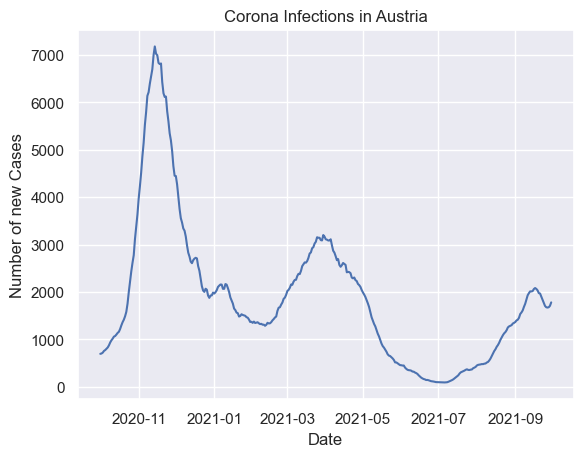

In [133]:
corona = pd.read_csv('../data/austria-covid.csv')
corona.date = pd.to_datetime(corona.date)
# Set the date as the x-axis
x = corona['date']

# Set the total cases and new cases as the y-axis
y1 = corona['new_deaths_smoothed']
y2 = corona['new_cases_smoothed']

# Plot the line chart
#plt.plot(x, y1, label='New Deaths')
plt.plot(x, y2, label='New Cases')

# Add the labels, title, and legend
plt.xlabel('Date')
plt.ylabel('Number of new Cases')
plt.title('Corona Infections in Austria')
#plt.legend()
plt.savefig("corona_cases.png", facecolor=fig.get_facecolor(), edgecolor='none', dpi=300)
# Show the plot
plt.show()